In [3]:
from Eval_v5_shaomu import *

In [4]:
path = 'G:/MDI_exp/1000_id/decades/'
path1 = 'G:/MDI_exp/1000_full/decades/'
id_cro, full_cro = find_both_file(path, path1, 'crossent')
id_kl,full_kl = find_both_file(path, path1, 'kl')
id_dict_cro, full_dict_cro = get_decade_data(path, path1, id_cro, full_cro)
id_dict_kl, full_dict_kl = get_decade_data(path, path1, id_kl, full_kl)

In [5]:
def count_(dict_):
    count_id_cro = {}
    for decade in dict_:
        count_id_cro[decade] = []
        for file in dict_[decade]:
            count_id_cro[decade].append(len(dict_[decade][file]))
    return count_id_cro

### How many outliers the program actually output

In [6]:
print('ID method under cross entropy criteria:')
count_id_cro = count_(id_dict_cro)
print(count_id_cro)
print('\nFULL method under cross entropy criteria:')
count_full_cro = count_(full_dict_cro)
print(count_full_cro)

ID method under cross entropy criteria:
{'fiftees': [273, 237, 207, 186, 178, 495, 387, 314], 'sixtees': [281, 240, 213, 201, 179, 496, 387, 316], 'seventees': [267, 228, 205, 199, 173, 477, 376, 311], 'eightees': [265, 247, 207, 189, 172, 486, 373, 311], 'ninetees': [268, 229, 210, 177, 165, 497, 385, 311], 'tens': [264, 234, 207, 180, 165, 491, 381, 320], 'zeroes': [261, 223, 207, 178, 164, 499, 369, 300]}

FULL method under cross entropy criteria:
{'fiftees': [243, 215, 198, 183, 165, 471, 359, 283], 'sixtees': [244, 216, 194, 184, 164, 453, 357, 280], 'seventees': [248, 210, 186, 171, 168, 465, 354, 299], 'eightees': [245, 219, 192, 173, 159, 470, 363, 295], 'ninetees': [242, 213, 202, 174, 161, 476, 352, 300], 'tens': [247, 218, 187, 174, 164, 456, 369, 300], 'zeroes': [244, 209, 187, 179, 162, 466, 342, 288]}


In [7]:
print('ID method under Kullback-leibler criteria:')
count_id_kl = count_(id_dict_kl)
print(count_id_kl)
print('\nFULL method under Kullback-leibler criteria:')
count_full_kl = count_(full_dict_kl)
print(count_full_kl)

ID method under Kullback-leibler criteria:
{'fiftees': [268, 235, 203, 184, 176, 473, 370, 304], 'sixtees': [272, 226, 209, 197, 180, 467, 366, 309], 'seventees': [261, 222, 201, 198, 173, 448, 360, 304], 'eightees': [261, 239, 205, 185, 168, 447, 359, 302], 'ninetees': [252, 222, 208, 177, 163, 458, 373, 307], 'tens': [256, 228, 199, 178, 162, 445, 362, 309], 'zeroes': [254, 220, 201, 175, 166, 464, 346, 295]}

FULL method under Kullback-leibler criteria:
{'fiftees': [258, 233, 204, 190, 174, 495, 375, 307], 'sixtees': [275, 244, 208, 194, 174, 491, 380, 318], 'seventees': [260, 223, 211, 191, 181, 468, 370, 305], 'eightees': [263, 244, 209, 184, 176, 474, 371, 313], 'ninetees': [252, 219, 207, 188, 169, 474, 371, 300], 'tens': [262, 237, 200, 181, 164, 470, 365, 303], 'zeroes': [250, 223, 200, 177, 165, 483, 363, 297]}


In [8]:
from matplotlib import pyplot as plt
import numpy as np
def preparation(count_):
    test = [[],[],[],[],[],[],[]]
    s = -1
    for i in count_:
        s+=1
        for j in count_[i]:
            test[s].append(j)
    return test

#box plot
def box_plot(count_id_cro,count_full_cro,criterion):
    
    if criterion == 'ce':
        cri_ = 'Cross Entropy criterion'

    if criterion == 'kl':
        cri_ = 'Kullback-Leibler criterion'
        
    mean_id = np.mean(count_id_cro)
    meadian_id = np.median(count_id_cro)
    mean_full = np.mean(count_full_cro)
    meadian_full = np.median(count_full_cro)
    
    
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    fig.suptitle('Distribution of the number of outlier points from MDI output' + '(' + cri_ + ') \n\n', fontsize=15)
    
    # plot box plot
    axs[0].plot((0.7, 7.8), (mean_id, mean_id), linestyle='--', color='darkgreen')
    mean_id_str = float("{:.2f}".format(mean_id))
    axs[0].text(7.45, mean_id+10 , mean_id_str, color='darkgreen')
    
    axs[0].plot((0.7, 7.8), (meadian_id, meadian_id), linestyle='--', color='mediumorchid')
    median_id_str = float("{:.2f}".format(meadian_id))
    axs[0].text(7.45, meadian_id+10 , median_id_str, color='mediumorchid')

    axs[0].legend(['Avg.Mean','Avg.Median'], loc=2)
    axs[0].boxplot(count_id_cro)
    axs[0].set_title('Identity gaussian method')
    
    # plot box plot
    axs[1].plot((0.7, 7.8), (mean_full, mean_full), linestyle='--', color='darkgreen')
    mean_full_str = float("{:.2f}".format(mean_full))
    axs[1].text(7.45, mean_full+10 , mean_full_str, color='darkgreen')
    
    axs[1].plot((0.7, 7.8), (meadian_full, meadian_full), linestyle='--', color='mediumorchid')
    median_full_str = float("{:.2f}".format(meadian_full))
    axs[1].text(7.45, meadian_full+10 , median_full_str, color='mediumorchid')

    axs[1].legend(['Avg.Mean','Avg.Median'], loc=2)
    
    axs[1].boxplot(count_full_cro)
    axs[1].set_title('Full gaussian method')
    
    
    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(count_full_cro))])
        ax.set_xlabel('Decades')
        ax.set_ylabel('Observed number of outlier points')
    
    # add x-tick labels
    plt.setp(axs, xticks=[y + 1 for y in range(len(count_full_cro))],
             xticklabels=['50s', '60s', '70s', '80s', '90s', '00s', '10s'])
    
    return 


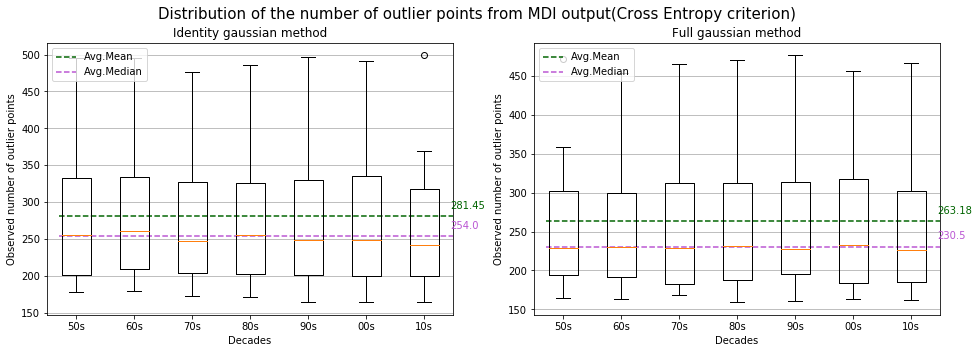

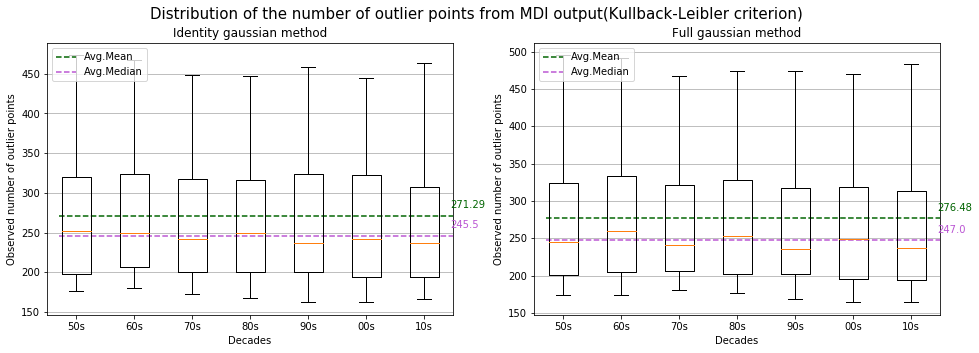

In [9]:
id_cro_count = preparation(count_id_cro)
full_cro_count = preparation(count_full_cro)
id_kl_count = preparation(count_id_kl)
full_kl_count = preparation(count_full_kl)
box_plot(id_cro_count,full_cro_count,'ce')
box_plot(id_kl_count,full_kl_count,'kl')

### Correlation between negative score and outlier length

In [10]:
def plot_score_length_with_zeroline(full_dict_cro):
    test = []
    length = []
    for i in full_dict_cro['fiftees']:
        for j in full_dict_cro['fiftees'][i]:
            #print(j[0])
            test.append(j)
            length.append([j[1]-j[0],j[2]])
            
    columns = list(zip(*length))
    x = columns[0]
    y =columns[1]
    
    import matplotlib as mpl
    cmap = mpl.cm.cool
    
    a, b = best_fit(x, y)
    
    spear_coef, spear_p = spearmanr(x, y)
    pearson_coef, pearson_p = pearsonr(x, y)
    per_s1 = '{:.2%}'.format(spear_coef)
    s_p1 = '{:.3f}'.format(spear_p)
    per_p1 = '{:.2%}'.format(pearson_coef)
    p_p1 = '{:.3f}'.format(pearson_p)
    
    
    
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
    plt.title('Correlation of outlier lengths and scores', fontsize=15)
    ax= plt.scatter(x,y,s=20,c=y,cmap=cmap)
    
    yfit = [a + b * xi for xi in x]
    plt.plot(x, yfit,color='darkblue')
    plt.plot((45, 250), (0, 0), linestyle='--', color='darkblue')
    
    
    plt.text(240, 0.2 , 'Outlier score=0', color='darkblue')
    
    plt.xlabel(
        'outlier lengths \n\nSpearmans coef: {}, P-value: {}\nPearson coef: {}, P-value: {}'.format(per_s1, s_p1, per_p1, p_p1),fontsize=13)
    plt.ylabel('outlier scores',fontsize=13)
    cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.75])
    cb = plt.colorbar(ax, cbar_ax)
    cb.set_label('outlier scores')
    plt.show()
    return

In [11]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import matplotlib as mpl

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b


def plot_score_length(full_dict_cro):
    test = []
    length = []
    for i in full_dict_cro['fiftees']:
        for j in full_dict_cro['fiftees'][i]:
            #print(j[0])
            test.append(j)
            length.append([j[1]-j[0],j[2]])
            
    columns = list(zip(*length))
    x = columns[0]
    y =columns[1]
    
    
    cmap = mpl.cm.cool
    a, b = best_fit(x, y)
    
    spear_coef, spear_p = spearmanr(x, y)
    pearson_coef, pearson_p = pearsonr(x, y)
    per_s1 = '{:.2%}'.format(spear_coef)
    s_p1 = '{:.3f}'.format(spear_p)
    per_p1 = '{:.2%}'.format(pearson_coef)
    p_p1 = '{:.3f}'.format(pearson_p)
    
    
    
    
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
    plt.title('Correlation of outlier lengths and scores', fontsize=15)
    ax= plt.scatter(x,y,s=20,c=y,cmap=cmap)
    
    yfit = [a + b * xi for xi in x]
    plt.plot(x, yfit,color='darkblue')
    #plt.plot((0, 200), (50, 50), linestyle='--', color='darkblue')
    #plt.text(240, 0.2 , 'Outlier score=0', color='darkblue')
    
    plt.xlabel(
        'outlier lengths \n\nSpearmans coef: {}, P-value: {}\nPearson coef: {}, P-value: {}'.format(per_s1, s_p1, per_p1, p_p1),fontsize=13)
    plt.ylabel('outlier scores',fontsize=13)
    cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.75])
    cb = plt.colorbar(ax, cbar_ax)
    cb.set_label('outlier scores')
    
    
    plt.show()
    return

best fit line:
y = 6.93 + 0.09x


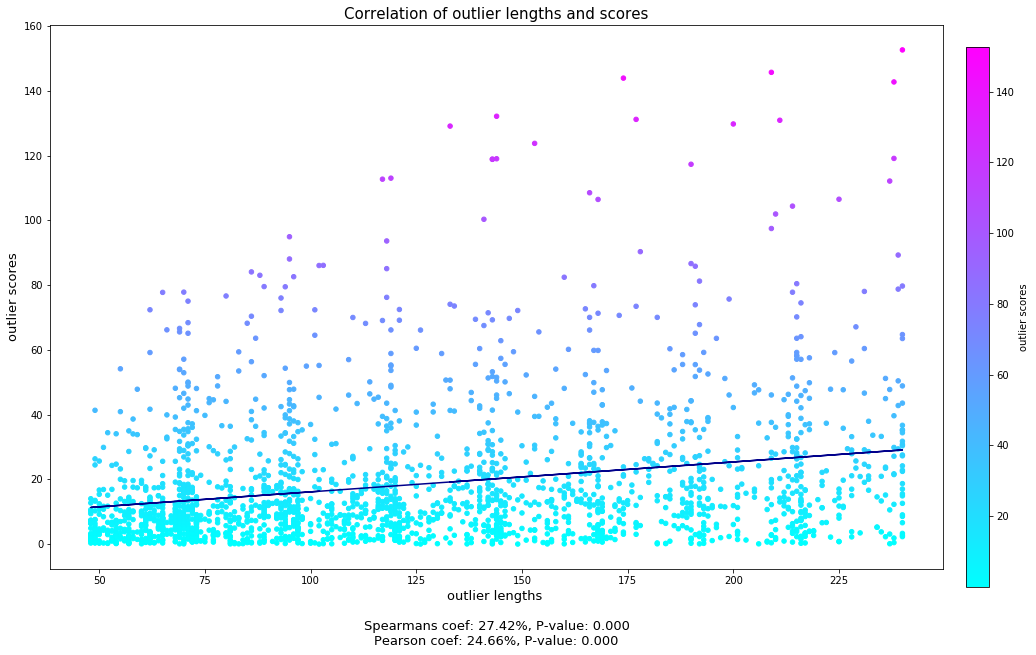

In [12]:
#ID method under Kullback leibler
plot_score_length(id_dict_kl)

best fit line:
y = 11.59 + -0.00x


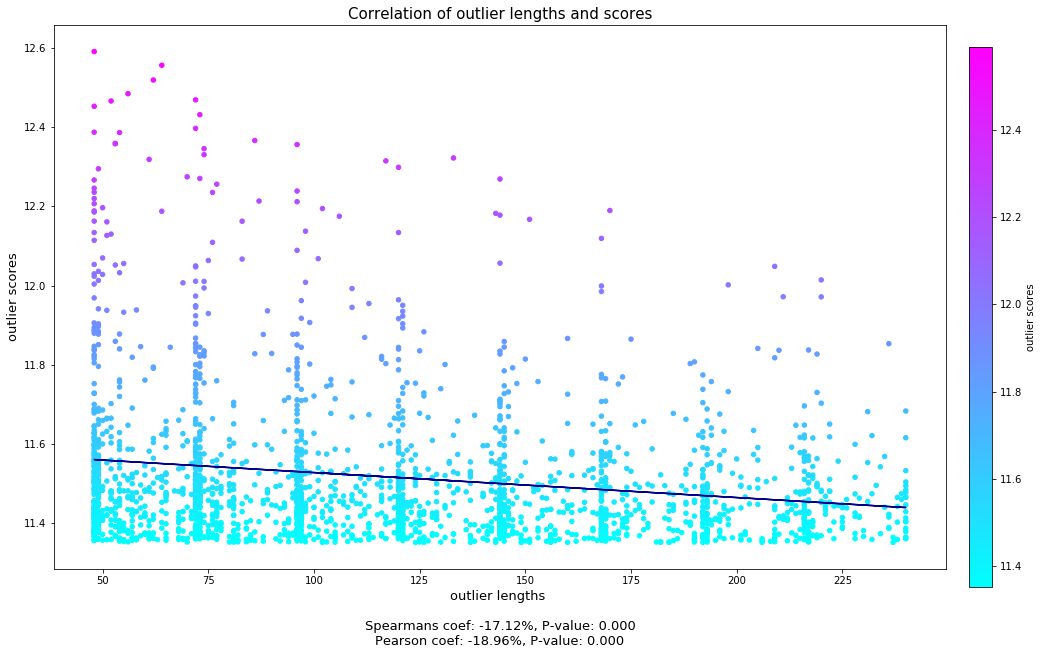

In [13]:
#ID method under cross entropy
plot_score_length(id_dict_cro)

best fit line:
y = 0.66 + -0.01x


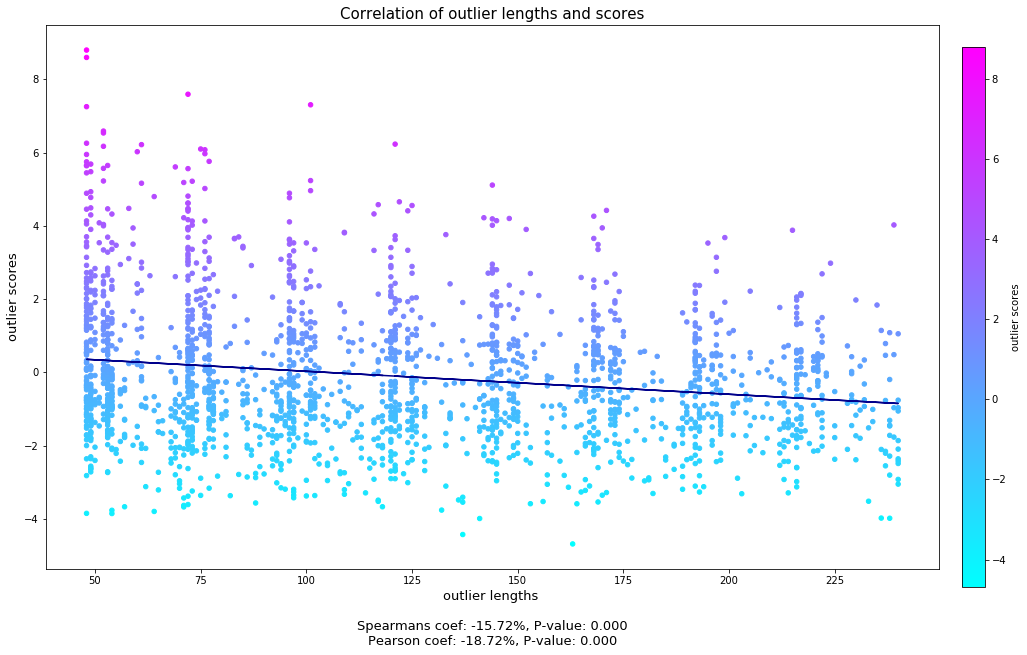

In [14]:
#Full method under cross entropy
plot_score_length(full_dict_cro)

best fit line:
y = 38.17 + 0.28x


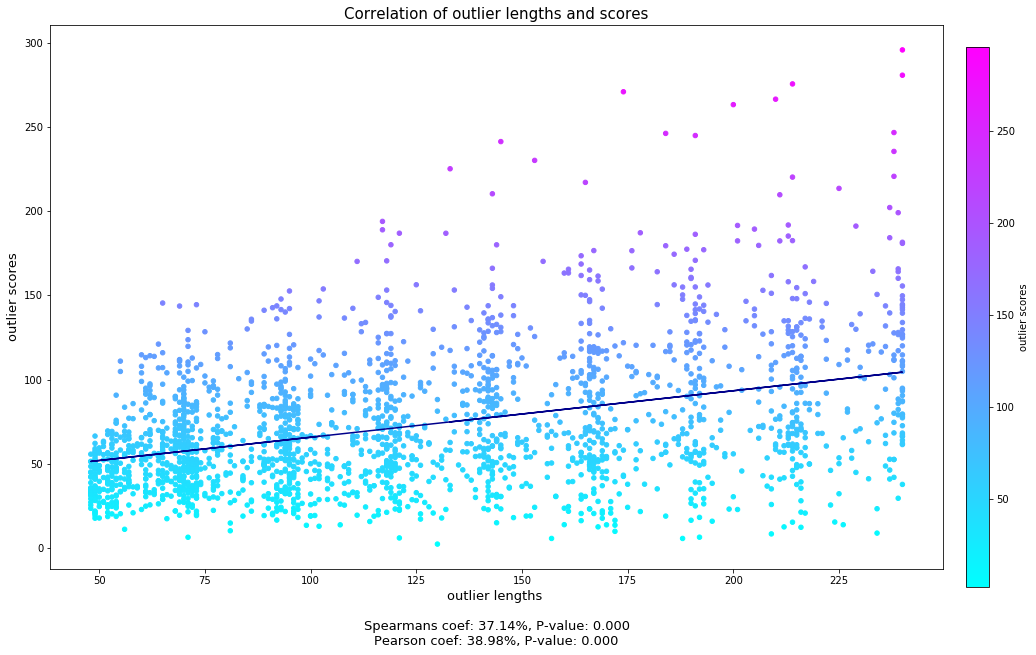

In [15]:
#Full method under kull-back Leibler
plot_score_length(full_dict_kl)

### Negative outlier score (observed only for Full method cross evtropy)

best fit line:
y = 0.66 + -0.01x


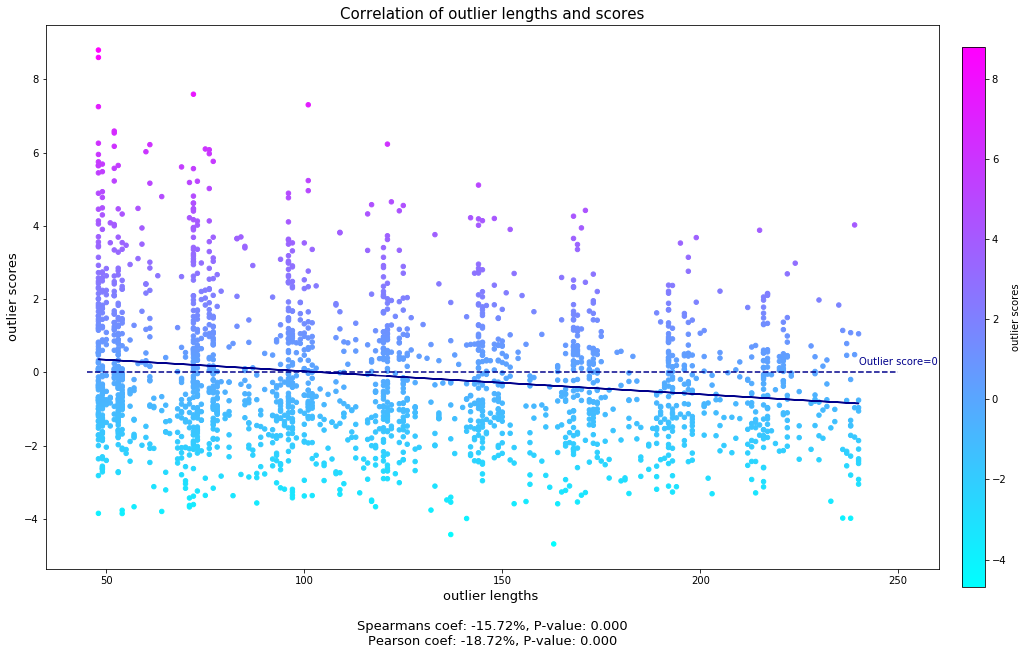

In [16]:
#Full method under cross entropy

#show line: outlier_score=0
plot_score_length_with_zeroline(full_dict_cro)

### Check if Unbiased Kullback-Leibler score exceed critical values

In [17]:
def count_all(count):
    num_ = 0
    for decade in count:
        for i in count[decade]:
            num_+=i
    return num_


def dec(a):
    return '{:.2%}'.format(a)

def count_significance(dict_,alpha):
    
    if alpha==0.05:
        signif_level = 16.91898
    elif alpha==0.01:
        signif_level = 21.66599
    
    count_signif = 0
    for decade in dict_:
        for file in dict_[decade]:
            for i in dict_[decade][file]:
                if i[2]>signif_level:
                    count_signif+=1
    return count_signif

count_all_id_kl = count_all(count_id_kl)
count_all_full_kl = count_all(count_full_kl)


print('Number of outlier intervals for ID method under Kull-back Leibler:{},\n\
Number of outlier intervals exceed the significance level(alpha=0.05):{},\n\
Percentage of outlier intervals exceed the significance level:{}'\
.format(count_all_id_kl, count_significance(id_dict_kl,0.05), dec(count_significance(id_dict_kl,0.05)/count_all_id_kl)))

print('\nNumber of outlier intervals for ID method under Kull-back Leibler:{},\n\
Number of outlier intervals exceed the significance level(alpha=0.01):{},\n\
Percentage of outlier intervals exceed the significance level:{}'\
.format(count_all_id_kl, count_significance(id_dict_kl,0.01), dec(count_significance(id_dict_kl,0.01)/count_all_id_kl)))

print('\nNumber of outlier intervals for Full method under Kull-back Leibler:{},\n\
Number of outlier intervals exceed the significance level(alpha=0.05):{},\n\
Percentage of outlier intervals exceed the significance level:{}'\
.format(count_all_full_kl, count_significance(full_dict_kl,0.05), dec(count_significance(full_dict_kl,0.05)/count_all_full_kl)))

print('\nNumber of outlier intervals for Full method under Kull-back Leibler:{},\n\
Number of outlier intervals exceed the significance level(alpha=0.01):{},\n\
Percentage of outlier intervals exceed the significance level:{}'\
.format(count_all_full_kl, count_significance(full_dict_kl,0.01), dec(count_significance(full_dict_kl,0.01)/count_all_full_kl)))

Number of outlier intervals for ID method under Kull-back Leibler:15192,
Number of outlier intervals exceed the significance level(alpha=0.05):6649,
Percentage of outlier intervals exceed the significance level:43.77%

Number of outlier intervals for ID method under Kull-back Leibler:15192,
Number of outlier intervals exceed the significance level(alpha=0.01):5291,
Percentage of outlier intervals exceed the significance level:34.83%

Number of outlier intervals for Full method under Kull-back Leibler:15483,
Number of outlier intervals exceed the significance level(alpha=0.05):15297,
Percentage of outlier intervals exceed the significance level:98.80%

Number of outlier intervals for Full method under Kull-back Leibler:15483,
Number of outlier intervals exceed the significance level(alpha=0.01):15070,
Percentage of outlier intervals exceed the significance level:97.33%
